In [1]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def Triangulate(A, B, n):

    vertices = [[0,0], [A,0], [0,B], [A,B]]
    cmap = plt.get_cmap('nipy_spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]

    if n%2==0:
        k = n/2-1
        locations = vertices
    else:
        k = n//2-1
        locations = vertices
        locations.append([A/2,0])

    others_x = np.random.rand(k)*A
    others_y = np.random.rand(k)*B    
    for i in range(k):
        locations.append([others_x[i], others_y[i]])
    local = np.array(locations)
    
    p = plt.figure()
    tri = Delaunay(local)
    p = plt.triplot(local[:,0], local[:,1], tri.simplices)
    for i in range(len(local)):
        p = plt.plot(local[i,0], local[i,1], 'o', color='green')
        p = plt.annotate(str(i), (local[i,0], local[i,1]), color='black')

    count = 0
    for point in tri.simplices:
        x = [local[point[0]][0], local[point[1]][0], local[point[2]][0]]
        y = [local[point[0]][1], local[point[1]][1], local[point[2]][1]]
        p = plt.fill(x,y, color=colors[count])
        p = plt.annotate(str(count), (np.sum(x)/3, np.sum(y)/3), color='white')
        count+=1
        count = count%len(colors)
        
    edges = []

    for point in tri.simplices:
        data = {"Vetrices": [], "Edges": []}
        data["Vetrices"] = sorted([point[0], point[1], point[2]])
        for vert1 in data["Vetrices"]:
            for vert2 in data["Vetrices"]:
                if vert1!=vert2:
                    if n%2==0:
                        corner = [0, 1, 2, 3]
                    else:
                        corner = [0, 1, 2, 3, 4]
                    if vert1 in corner and vert2  in corner:
                        continue
                    else:    
                        if data["Edges"].count(sorted([vert1, vert2]))==0:
                            data["Edges"].append(sorted([vert1, vert2]))
        edges.append(data)
    
    fname = str(n) + "-Triangulation.png"
    plt.savefig(fname, dpi=600)

    return p, pd.DataFrame(edges)

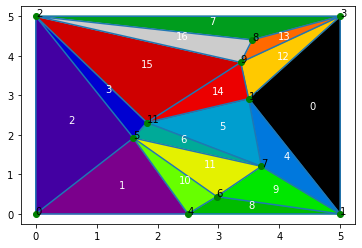

In [3]:
p, triangles = Triangulate(5,5,17)

In [4]:
triangles

,Vetrices,Edges
0,"[1, 3, 10]","[[1, 10], [3, 10]]"
1,"[0, 4, 5]","[[0, 5], [4, 5]]"
2,"[0, 2, 5]","[[0, 5], [2, 5]]"
3,"[2, 5, 11]","[[2, 5], [2, 11], [5, 11]]"
4,"[1, 7, 10]","[[1, 7], [1, 10], [7, 10]]"
5,"[7, 10, 11]","[[7, 10], [7, 11], [10, 11]]"
6,"[5, 7, 11]","[[5, 7], [5, 11], [7, 11]]"
7,"[2, 3, 8]","[[2, 8], [3, 8]]"
8,"[1, 4, 6]","[[1, 6], [4, 6]]"
9,"[1, 6, 7]","[[1, 6], [1, 7], [6, 7]]"
